# データハンドリングの練習
Create: 2018/02/12<br>
Author: drsenri (H. Shibata)

## 1. はじめに
このノートブックでは、データの可視化や加工 (データハンドリングを呼びます) の方法を学びます。<br>
ダミーデータでは、numpyやpandasの「生きた」使い方が掴みづらい部分がありましたが、今回はより実践的な内容になります。

## 2. ライブラリのインポートと初期設定
前回同様にnumpy, pandasをインポートします。<br>
さらに、サンプルデータのためにsklearn.datasetsもインポートし、マジックコマンドもここで実行しておきます。<br>
余談ですが、sklearnは機械学習のためのインターフェースを提供するライブラリで、今後もよく登場します。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection
%matplotlib inline

上記のsklearnの各モジュールをimportする際、以下の方法もあります (むしろ、以下の方法が一般的でしょう)。<br>
> from sklearn import datasets, metrics, model_selection<br>

この場合、以下のsklearn.datasetsがdatasetsになるなど、名前が変わる点に注意してください。

## 3.　サンプルデータの読み込み
sklearn.datasetsから、irisをロードします。<br>
irisはアヤメの計測データで、練習問題でよく使用されます。<br>
読み込んだ後、DataFrameに変換します。<br>
4行目のコードは、iris_yをarrayからDataFrameに変換し、iris_xとiris_yをconcatで横方向に連結しています。<br>
詳しい挙動を理解するには、iris_xとiris_yのデータを確認してみましょう。

In [2]:
iris = sklearn.datasets.load_iris()
iris_x = pd.DataFrame(iris.data, columns=iris.feature_names) # アヤメの計測データ
iris_y = iris.target # アヤメの品種
iris_df = pd.concat(objs = (iris_x, pd.DataFrame(iris_y, columns = ["target"])), axis = 1)

## 4. データの可視化
データをロードしたら、まずデータの可視化を行います。<br>
可視化とは、サイズはどの程度か、どのような項目があるか、平均は、偏りは、……と、データの性質を分析することです。<br>
データの癖を掴むことが分析の品質に強く影響するため、注意深く行う必要があります。<br>
観点は様々ですが、一例として以下に挙げるようなものがあります。<br>
- データの見た目 (文字通りの「見た目」。分析は魔法ではなく、観察に基づくアートです)
- データの大きさ (何行、何列あるか)
- 欠損値の有無 (欠損値とは、不明な値を指します。今回のサンプルデータには存在しませんが、実際のデータでは頻出し、処理方法で分析の品質が変わってきます)
- 基本統計量 (平均、標準偏差、最大値、最小値などを指します)
- ヒストグラム (データの分布の図です。基本統計量をより視覚的に把握できます)
- 項目同士の相関 (相関が強い項目の組み合わせが存在する場合、分析を誤る危険性があります)

In [3]:
iris_df.head() # 先頭5行を抜き出す

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.shape # データの大きさ

(150, 5)

In [5]:
iris_df.isnull().sum() # 欠損の確認 (今回はすべて0です)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
iris_df.describe() # 列ごとの基本統計量 (各統計量の意味はしっかり理解しておきましょう)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris_df.mean() # 平均値のみ欲しい場合、meanメソッドを使う (返り値はpd.Series)

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
target               1.000000
dtype: float64

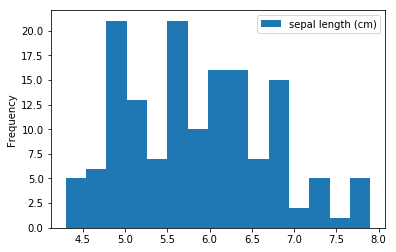

In [8]:
iris_df[["sepal length (cm)"]].plot.hist(bins = 15) # 'sepal length (cm)' の散布図

In [9]:
iris_df.corr() # 相関係数を出力する (デフォルトはpearson). 1に近いほど2つの変数が連動して変化していることを示しています

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


## 5. 分析する
(データ)分析の定義は色々ありそうですが、ここでは以下の要件を満たす行為を(データ)分析と呼ぶことにします。<br>
- データの中から要素同士の関係性を発見・説明すること
- 説明がデータに基づいていること

分析の手法は様々ですが、ここではいくつかの手法について見てみることにします。

### 5-1. 2変数の散布図を描く
相関係数を見ると、いくつか相関の非常に高い組み合わせが見られます。<br>
ここでは、相関の高い組と低い組でそれぞれ散布図を書いてみましょう。<br>
散布図とは、軸 (基本的に2軸です) を取り、1サンプル (データの1行) を1つの点としてデータ空間を表現したものです。<br>
相関係数が0に近い組み合わせではプロットが散っており、相関係数が1に近い組み合わせでは一直線にプロットが並んでいます。<br>
(1枚の画像に2つのプロットを載せるため、axオブジェクトを2つ生成しています)

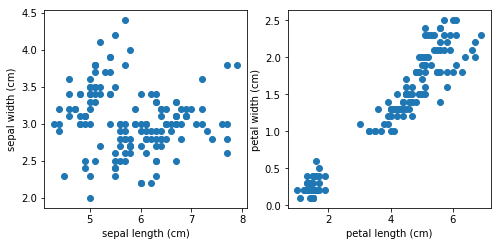

In [10]:
fig = plt.figure(figsize = [8, 8])
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(x = iris_df["sepal length (cm)"], y = iris_df["sepal width (cm)"])
ax1.set_xlabel("sepal length (cm)")
ax1.set_ylabel("sepal width (cm)")
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(x = iris_df["petal length (cm)"], y = iris_df["petal width (cm)"])
ax2.set_xlabel("petal length (cm)")
ax2.set_ylabel("petal width (cm)")
plt.show()

### 5-2. 品種のバラつきを見る
上記の散布図では2変数の組み合わせは理解できましたが、品種との関係があるかどうかはよくわかりません。<br>
そこで、品種毎にプロットの色を変えて可視化してみましょう。

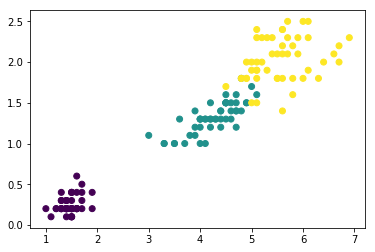

In [11]:
plt.scatter(x = iris_df["petal length (cm)"], y = iris_df["petal width (cm)"], c = iris_df["target"])

### 5-3. データから品種を予測する
色を分けたプロットから、3つの品種がある程度きれいに分かれていることがわかりました。<br>
そこで、実際に品種を予測してみましょう。<br>
今回は、決定木というアルゴリズムを使って品種を予測するモデルを作ってみます (モデルとは、予測を行う複雑な数式のようなものです)。<br>
まず、学習データ (train) と検証データ (test) を100:50に分け、100個のデータで決定木モデルを作成します。

In [12]:
import sklearn.tree
iris_tree = sklearn.tree.DecisionTreeClassifier()
train, test = sklearn.model_selection.train_test_split(iris_df, test_size = 50, random_state = 0) # サンプリングを固定するため、random_state = 0で擬似乱数を固定しています
train_X = train.drop("target", axis = 1)
train_Y = train["target"]
iris_tree.fit(X = train_X, y = train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

モデルを用いて、検証データに対して予測してみます。

In [13]:
test_X = test.drop("target", axis = 1)
test_Y = test["target"]
predict = iris_tree.predict(X = test_X) # 予測

予測の正しさ・誤りをわかりやすく評価するには、confusion matrix (混合行列)を作成します。<br>
行側が予測値、列側が正解です。行列の対角成分が正解で、それ以外が誤りとなります。

In [14]:
iris_cm = sklearn.metrics.confusion_matrix(y_pred=predict, y_true=test_Y)
pd.DataFrame(iris_cm)

,0,1,2
0,16,0,0
1,0,18,1
2,0,1,14


正解率は、正解した数/予測した数で計算できます。<br>
正解した数は対角成分の和として、予測した数は混合行列の全要素の和として求めることができます。

In [15]:
iris_cm.diagonal().sum()/iris_cm.sum()

0.95999999999999996

約96%と、良い精度で予測することができました。<br>
決定木の構造 (どういう基準で分類しているか) を表示することも可能ですが、Graphvizなどの環境が必要なため、今回は割愛します。<br>
(興味があれば、webで調べるなどして挑戦してみてください。)

## 6. 他のデータセット
sklearn.datasetsにはiris以外にも様々なデータセットが用意されています。<br>
自分でデータをロードし、可視化・分析のプロセスを練習してみましょう。<br>
sklearn.datasetsのドキュメントは以下を参照してください。<br>
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets